In [ ]:
import pandas as pd
import numpy as np

data = pd.read_csv('train.csv')
print(data.head(5))

y_train = data['sign'].to_numpy()
y_train = np.hstack((y_train, y_train))
print(y_train)

   sign                              filename
0     0  200d8766-4240-44d1-a2da-65dc4ee7973a
1     0  87174854-b7b6-4cb2-8183-4ca2bbd26b9d
2     0  c089638e-b683-436a-a3a3-3e5be972c4f6
3     1  8790e76c-f485-49a6-abaf-3147436ca085
4     0  c06b01db-8934-4c72-b568-508a32c4b170
[0 0 0 ... 1 1 0]


In [ ]:
import numpy as np
import cv2
import pandas as pd
import sklearn
import os
from pathlib import Path
curr_path = os.getcwd()

data = pd.read_csv('train.csv')
print(data.head(5))

directory = os.path.join(curr_path, "avia-train30_alignment/avia-train")
arr_image_list1 = []
for row in data.values:
    abspath = os.path.join(directory, row[1]+ '.png')
    image = cv2.imread(abspath, 0)
    arr_image = np.asarray(image)
    arr_image_list1.append(arr_image)
arr_image_list1 = np.vstack(arr_image_list1)
print(arr_image_list1.shape)

directory = os.path.join(curr_path, "avia-train30-random_alignment/avia-train")
arr_image_list2 = []
for row in data.values:
    abspath = os.path.join(directory, row[1]+ '.png')
    image = cv2.imread(abspath, 0)
    arr_image = np.asarray(image)
    arr_image_list2.append(arr_image)
arr_image_list2 = np.vstack(arr_image_list2)
print(arr_image_list2.shape)

arr_image_list = np.vstack((arr_image_list1, arr_image_list2))
print(arr_image_list.shape)
np.savetxt("np_image_train.csv", arr_image_list, delimiter=";", fmt = '%3.0d')
#X = np.array([part[0] for part in reviews_with_len])
#Y = np.array([part[1] for part in reviews_with_len])
#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


   sign                              filename
0     0  200d8766-4240-44d1-a2da-65dc4ee7973a
1     0  87174854-b7b6-4cb2-8183-4ca2bbd26b9d
2     0  c089638e-b683-436a-a3a3-3e5be972c4f6
3     1  8790e76c-f485-49a6-abaf-3147436ca085
4     0  c06b01db-8934-4c72-b568-508a32c4b170
(932400, 30)
(932400, 30)
(1864800, 30)


In [ ]:
import numpy as np
import cv2
import pandas as pd
import sklearn
import os
from pathlib import Path
curr_path = os.getcwd()

data1 = pd.read_csv('test.csv')
print(data1.head(5))
directory = os.path.join(curr_path, "avia-test30_alignment/avia-test")
arr_image_list = []
for row in data1.values:
    abspath = os.path.join(directory, row[0]+ '.png')
    image = cv2.imread(abspath, 0)
    arr_image = np.asarray(image)
    arr_image_list.append(arr_image)
arr_image_list = np.vstack(arr_image_list)

print(arr_image_list.shape)
np.savetxt("np_image_test.csv", arr_image_list, delimiter=";", fmt = '%3.0d')

                               filename
0  68f33844-472b-4111-b600-f90d544833c7
1  7d93a21d-1f16-49ce-8fcc-edf12c40f549
2  4a820650-7acd-489a-ad14-9d7ad8c73b6b
3  819b216b-2b6c-4539-a722-70648c0706c6
4  45f7c47d-03cc-40cd-acc5-b8c1c57872fa
(30000, 30)


# LOAD DATA

In [ ]:
import numpy as np

x_train = np.loadtxt('np_image_train.csv', delimiter=";")
#data_train = data_train.sample(frac = 1).reset_index(drop = True)
print(x_train.shape)

x_test = np.loadtxt('np_image_test.csv', delimiter=";")
print(x_test.shape)

x_train = x_train.reshape(62160,30,30,1)
x_test = x_test.reshape(1000,30,30,1)
print(x_train.shape)
print(x_test.shape)

(1864800, 30)
(30000, 30)
(62160, 30, 30, 1)
(1000, 30, 30, 1)


In [ ]:
#from sklearn.model_selection import train_test_split
#Xtrain, Xval, Ytrain, Yval = train_test_split(x_train, y_train, test_size=0.1, random_state=42)
import pandas as pd
data = pd.read_csv('train.csv')
print(data.head(5))
y_train = data['sign'].to_numpy()
y_train = np.hstack((y_train, y_train))

   sign                              filename
0     0  200d8766-4240-44d1-a2da-65dc4ee7973a
1     0  87174854-b7b6-4cb2-8183-4ca2bbd26b9d
2     0  c089638e-b683-436a-a3a3-3e5be972c4f6
3     1  8790e76c-f485-49a6-abaf-3147436ca085
4     0  c06b01db-8934-4c72-b568-508a32c4b170


In [ ]:
#from sklearn.metrics import precision_score, recall_score, f1_score
from keras import backend as K 
def precision(y_true, y_pred):
    """Precision metric.

    Only computes a batch-wise average of precision.

    Computes the precision, a metric for multi-label classification of
    how many selected items are relevant.
    """
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision


def recall(y_true, y_pred):
    """Recall metric.

    Only computes a batch-wise average of recall.

    Computes the recall, a metric for multi-label classification of
    how many relevant items are selected.
    """
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall


def f1(y_true, y_pred):
    def recall(y_true, y_pred):
        """Recall metric.

        Only computes a batch-wise average of recall.

        Computes the recall, a metric for multi-label classification of
        how many relevant items are selected.
        """
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

    def precision(y_true, y_pred):
        """Precision metric.

        Only computes a batch-wise average of precision.

        Computes the precision, a metric for multi-label classification of
        how many selected items are relevant.
        """
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision

    precision = precision(y_true, y_pred)
    recall = recall(y_true, y_pred)
    return 2 * ((precision * recall) / (precision + recall + K.epsilon()))

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout
from keras.optimizers import Adam

optimizer = Adam(lr=0.00001)

# создание модели
model = Sequential()
model.add(Conv2D(32, (10,10), activation='relu', input_shape=(30,30,1)))
model.add(Conv2D(64, (8,8), activation='relu'))
model.add(Conv2D(128, (6,6), activation='relu'))
model.add(Conv2D(256, (5,5), activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(256, 'relu'))
model.add(Dense(32, 'relu'))
model.add(Dense(1, 'sigmoid'))

model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy', precision, recall, f1])
model.summary()

Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_91 (Conv2D)           (None, 21, 21, 32)        3232      
_________________________________________________________________
conv2d_92 (Conv2D)           (None, 14, 14, 64)        131136    
_________________________________________________________________
conv2d_93 (Conv2D)           (None, 9, 9, 128)         295040    
_________________________________________________________________
conv2d_94 (Conv2D)           (None, 5, 5, 256)         819456    
_________________________________________________________________
max_pooling2d_48 (MaxPooling (None, 1, 1, 256)         0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 1, 1, 256)         0         
_________________________________________________________________
flatten_16 (Flatten)         (None, 256)             

In [ ]:
#hist = model.fit(Xtrain, Ytrain, validation_data=(Xval, Yval), epochs=50)
#print(hist.history)
from keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint("model-{epoch:02d}-{val_f1:.2f}.hdf5", 
                             monitor='val_f1', save_best_only=True, mode='max')
#model.load_weights('model-38-0.93.hdf5')
history_trainable = model.fit(x_train, y_train, batch_size=256, epochs=500, validation_split=0.05, callbacks = [checkpoint])

Epoch 1/500
231/231 [==============================] - 7s 25ms/step - loss: 0.7074 - accuracy: 0.7341 - precision: 0.4877 - recall: 0.4553 - f1: 0.4672 - val_loss: 0.3005 - val_accuracy: 0.8745 - val_precision: 0.7395 - val_recall: 0.7817 - val_f1: 0.7588
Epoch 2/500
231/231 [==============================] - 5s 22ms/step - loss: 0.2989 - accuracy: 0.8734 - precision: 0.7642 - recall: 0.7222 - f1: 0.7395 - val_loss: 0.2491 - val_accuracy: 0.8951 - val_precision: 0.7762 - val_recall: 0.8326 - val_f1: 0.8026
Epoch 3/500
231/231 [==============================] - 5s 22ms/step - loss: 0.2264 - accuracy: 0.9115 - precision: 0.8407 - recall: 0.8067 - f1: 0.8215 - val_loss: 0.2297 - val_accuracy: 0.9093 - val_precision: 0.7922 - val_recall: 0.8845 - val_f1: 0.8340
Epoch 4/500
231/231 [==============================] - 5s 22ms/step - loss: 0.1967 - accuracy: 0.9234 - precision: 0.8597 - recall: 0.8351 - f1: 0.8454 - val_loss: 0.2023 - val_accuracy: 0.9205 - val_precision: 0.8343 - val_recall: 

Epoch 33/500
231/231 [==============================] - 5s 22ms/step - loss: 0.0555 - accuracy: 0.9801 - precision: 0.9643 - recall: 0.9569 - f1: 0.9602 - val_loss: 0.1433 - val_accuracy: 0.9511 - val_precision: 0.8887 - val_recall: 0.9215 - val_f1: 0.9039
Epoch 34/500
231/231 [==============================] - 5s 22ms/step - loss: 0.0523 - accuracy: 0.9823 - precision: 0.9693 - recall: 0.9626 - f1: 0.9656 - val_loss: 0.1468 - val_accuracy: 0.9495 - val_precision: 0.8758 - val_recall: 0.9255 - val_f1: 0.8994
Epoch 35/500
231/231 [==============================] - 5s 22ms/step - loss: 0.0508 - accuracy: 0.9823 - precision: 0.9679 - recall: 0.9616 - f1: 0.9643 - val_loss: 0.1460 - val_accuracy: 0.9530 - val_precision: 0.8913 - val_recall: 0.9184 - val_f1: 0.9041
Epoch 36/500
231/231 [==============================] - 5s 22ms/step - loss: 0.0492 - accuracy: 0.9828 - precision: 0.9701 - recall: 0.9619 - f1: 0.9655 - val_loss: 0.1443 - val_accuracy: 0.9495 - val_precision: 0.8828 - val_reca

Epoch 65/500
231/231 [==============================] - 5s 22ms/step - loss: 0.0155 - accuracy: 0.9945 - precision: 0.9905 - recall: 0.9877 - f1: 0.9890 - val_loss: 0.1741 - val_accuracy: 0.9591 - val_precision: 0.9067 - val_recall: 0.9298 - val_f1: 0.9174
Epoch 66/500
231/231 [==============================] - 5s 23ms/step - loss: 0.0146 - accuracy: 0.9953 - precision: 0.9921 - recall: 0.9895 - f1: 0.9907 - val_loss: 0.1706 - val_accuracy: 0.9585 - val_precision: 0.9260 - val_recall: 0.9030 - val_f1: 0.9136
Epoch 67/500
231/231 [==============================] - 5s 22ms/step - loss: 0.0152 - accuracy: 0.9951 - precision: 0.9906 - recall: 0.9904 - f1: 0.9904 - val_loss: 0.1676 - val_accuracy: 0.9601 - val_precision: 0.9163 - val_recall: 0.9218 - val_f1: 0.9182
Epoch 68/500
231/231 [==============================] - 5s 22ms/step - loss: 0.0152 - accuracy: 0.9948 - precision: 0.9909 - recall: 0.9883 - f1: 0.9895 - val_loss: 0.1750 - val_accuracy: 0.9611 - val_precision: 0.9234 - val_reca

Epoch 97/500
231/231 [==============================] - 5s 22ms/step - loss: 0.0057 - accuracy: 0.9982 - precision: 0.9971 - recall: 0.9962 - f1: 0.9966 - val_loss: 0.2142 - val_accuracy: 0.9611 - val_precision: 0.9178 - val_recall: 0.9238 - val_f1: 0.9202
Epoch 98/500
231/231 [==============================] - 5s 22ms/step - loss: 0.0072 - accuracy: 0.9974 - precision: 0.9951 - recall: 0.9947 - f1: 0.9948 - val_loss: 0.2106 - val_accuracy: 0.9607 - val_precision: 0.9116 - val_recall: 0.9303 - val_f1: 0.9201
Epoch 99/500
231/231 [==============================] - 5s 22ms/step - loss: 0.0061 - accuracy: 0.9980 - precision: 0.9964 - recall: 0.9957 - f1: 0.9960 - val_loss: 0.2162 - val_accuracy: 0.9582 - val_precision: 0.9025 - val_recall: 0.9317 - val_f1: 0.9161
Epoch 100/500
231/231 [==============================] - 5s 22ms/step - loss: 0.0058 - accuracy: 0.9981 - precision: 0.9963 - recall: 0.9959 - f1: 0.9961 - val_loss: 0.2084 - val_accuracy: 0.9614 - val_precision: 0.9314 - val_rec

231/231 [==============================] - 5s 22ms/step - loss: 0.0041 - accuracy: 0.9989 - precision: 0.9976 - recall: 0.9980 - f1: 0.9978 - val_loss: 0.2371 - val_accuracy: 0.9582 - val_precision: 0.9098 - val_recall: 0.9222 - val_f1: 0.9154
Epoch 129/500
231/231 [==============================] - 5s 22ms/step - loss: 0.0035 - accuracy: 0.9988 - precision: 0.9976 - recall: 0.9976 - f1: 0.9976 - val_loss: 0.2352 - val_accuracy: 0.9598 - val_precision: 0.9196 - val_recall: 0.9162 - val_f1: 0.9173
Epoch 130/500
231/231 [==============================] - 5s 22ms/step - loss: 0.0036 - accuracy: 0.9988 - precision: 0.9974 - recall: 0.9980 - f1: 0.9976 - val_loss: 0.2386 - val_accuracy: 0.9585 - val_precision: 0.8959 - val_recall: 0.9342 - val_f1: 0.9141
Epoch 131/500
231/231 [==============================] - 5s 22ms/step - loss: 0.0045 - accuracy: 0.9986 - precision: 0.9966 - recall: 0.9974 - f1: 0.9970 - val_loss: 0.2144 - val_accuracy: 0.9624 - val_precision: 0.9226 - val_recall: 0.9229

Epoch 160/500
231/231 [==============================] - 5s 23ms/step - loss: 0.0027 - accuracy: 0.9991 - precision: 0.9981 - recall: 0.9983 - f1: 0.9982 - val_loss: 0.2514 - val_accuracy: 0.9614 - val_precision: 0.9268 - val_recall: 0.9057 - val_f1: 0.9150
Epoch 161/500
231/231 [==============================] - 5s 22ms/step - loss: 0.0030 - accuracy: 0.9990 - precision: 0.9984 - recall: 0.9977 - f1: 0.9980 - val_loss: 0.2346 - val_accuracy: 0.9633 - val_precision: 0.9264 - val_recall: 0.9228 - val_f1: 0.9239
Epoch 162/500
231/231 [==============================] - 5s 22ms/step - loss: 0.0018 - accuracy: 0.9994 - precision: 0.9988 - recall: 0.9991 - f1: 0.9989 - val_loss: 0.2430 - val_accuracy: 0.9598 - val_precision: 0.9260 - val_recall: 0.9012 - val_f1: 0.9125
Epoch 163/500
180/231 [======================>.......] - ETA: 1s - loss: 0.0026 - accuracy: 0.9991 - precision: 0.9984 - recall: 0.9981 - f1: 0.9982

KeyboardInterrupt: 

In [ ]:
model.load_weights('model-101-0.93.hdf5')

In [ ]:
result = model.predict_classes(x_test)
print(result.shape)
data_test = pd.read_csv('test.csv')
print(data_test.head(5))
data_test['sign'] = result
data_test = data_test[['sign', 'filename']]
print(data_test.head(5))
data_test.to_csv('result.csv', index = None)
print(data_test[data_test['sign']==1].shape)

(1000, 1)
                               filename
0  68f33844-472b-4111-b600-f90d544833c7
1  7d93a21d-1f16-49ce-8fcc-edf12c40f549
2  4a820650-7acd-489a-ad14-9d7ad8c73b6b
3  819b216b-2b6c-4539-a722-70648c0706c6
4  45f7c47d-03cc-40cd-acc5-b8c1c57872fa
   sign                              filename
0     0  68f33844-472b-4111-b600-f90d544833c7
1     0  7d93a21d-1f16-49ce-8fcc-edf12c40f549
2     0  4a820650-7acd-489a-ad14-9d7ad8c73b6b
3     1  819b216b-2b6c-4539-a722-70648c0706c6
4     0  45f7c47d-03cc-40cd-acc5-b8c1c57872fa
(211, 2)


(62160, 1)
   sign                              filename
0     0  200d8766-4240-44d1-a2da-65dc4ee7973a
1     0  87174854-b7b6-4cb2-8183-4ca2bbd26b9d
2     0  c089638e-b683-436a-a3a3-3e5be972c4f6
3     1  8790e76c-f485-49a6-abaf-3147436ca085
4     0  c06b01db-8934-4c72-b568-508a32c4b170
   sign  sign_predict                              filename
0     0             0  200d8766-4240-44d1-a2da-65dc4ee7973a
1     0             0  87174854-b7b6-4cb2-8183-4ca2bbd26b9d
2     0             0  c089638e-b683-436a-a3a3-3e5be972c4f6
3     1             1  8790e76c-f485-49a6-abaf-3147436ca085
4     0             0  c06b01db-8934-4c72-b568-508a32c4b170
(115, 3)


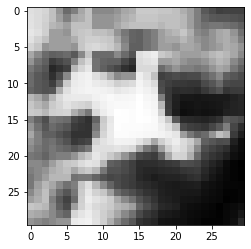

sign: 1 predict: 0


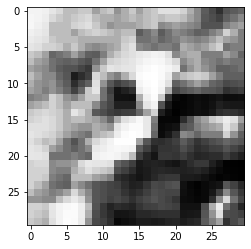

sign: 0 predict: 1


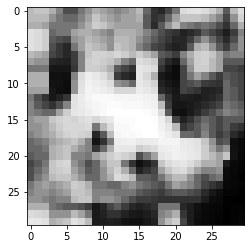

sign: 1 predict: 0


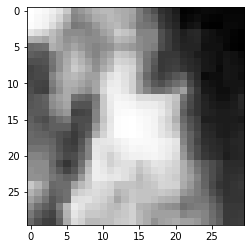

sign: 1 predict: 0


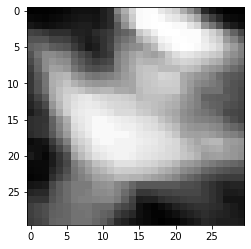

sign: 1 predict: 0


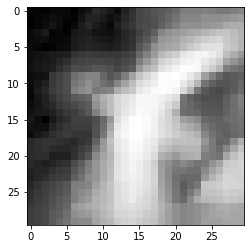

sign: 1 predict: 0


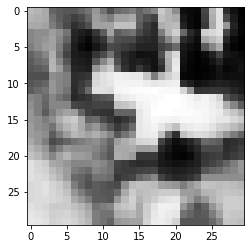

sign: 1 predict: 0


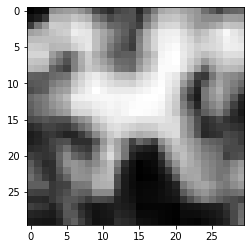

sign: 0 predict: 1


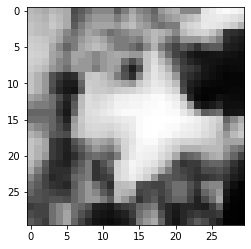

sign: 0 predict: 1


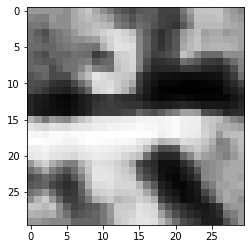

sign: 1 predict: 0


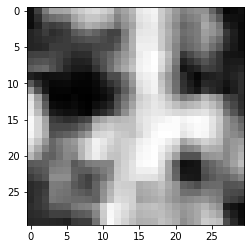

sign: 0 predict: 1


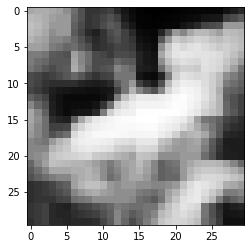

sign: 1 predict: 0


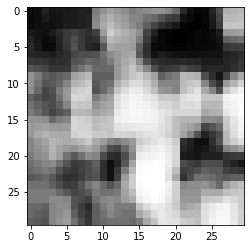

sign: 0 predict: 1


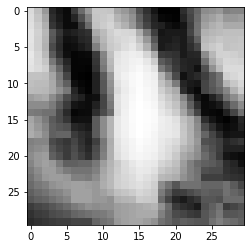

sign: 1 predict: 0


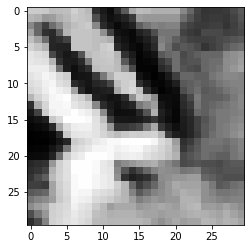

sign: 0 predict: 1


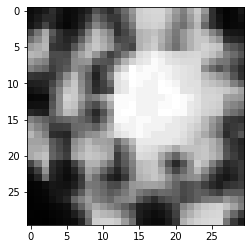

sign: 0 predict: 1


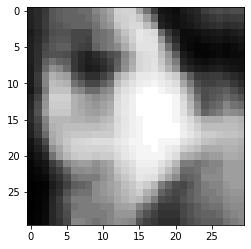

sign: 1 predict: 0


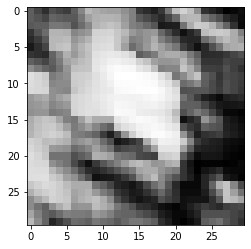

sign: 0 predict: 1


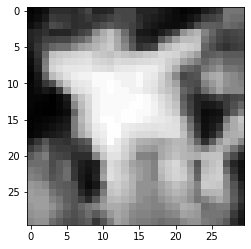

sign: 1 predict: 0


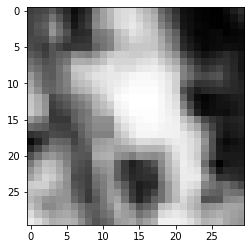

sign: 0 predict: 1


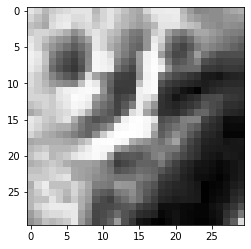

sign: 1 predict: 0


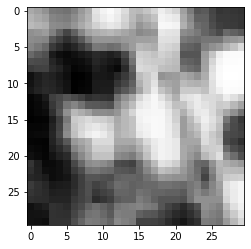

sign: 0 predict: 1


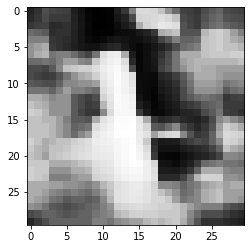

sign: 1 predict: 0


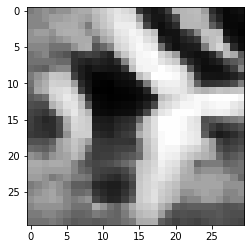

sign: 1 predict: 0


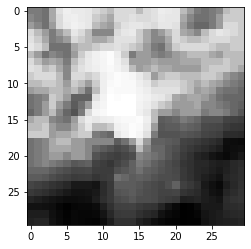

sign: 1 predict: 0


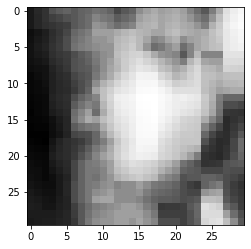

sign: 1 predict: 0


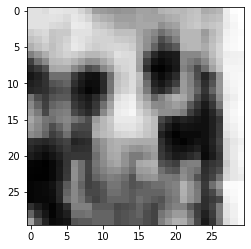

sign: 0 predict: 1


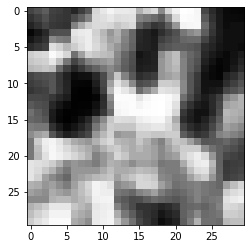

sign: 0 predict: 1


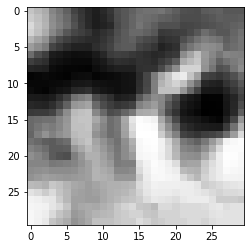

sign: 1 predict: 0


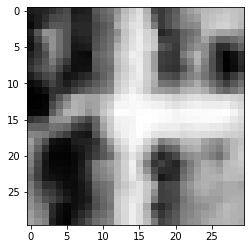

sign: 0 predict: 1


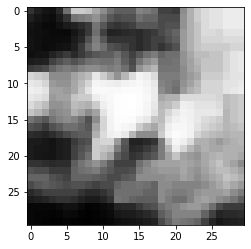

sign: 1 predict: 0


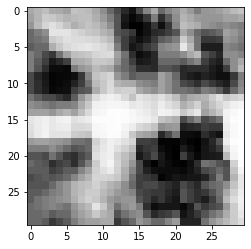

sign: 1 predict: 0


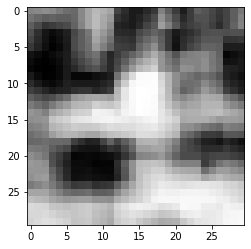

sign: 0 predict: 1


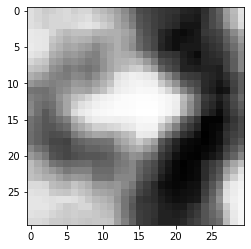

sign: 1 predict: 0


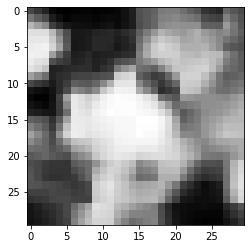

sign: 0 predict: 1


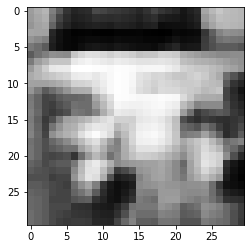

sign: 0 predict: 1


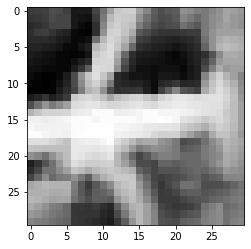

sign: 1 predict: 0


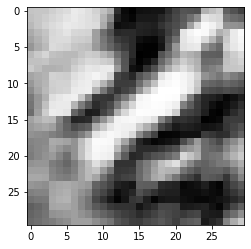

sign: 0 predict: 1


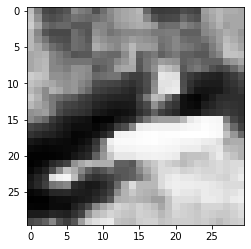

sign: 1 predict: 0


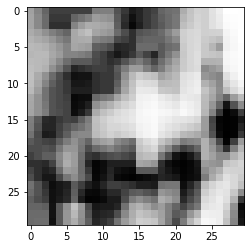

sign: 1 predict: 0


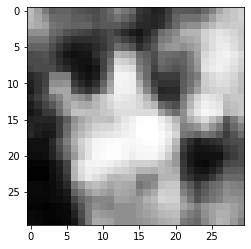

sign: 0 predict: 1


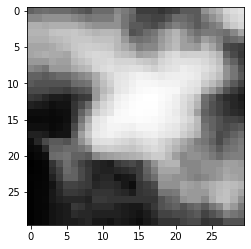

sign: 1 predict: 0


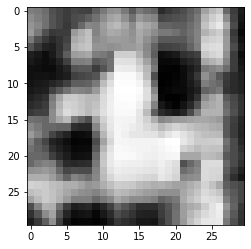

sign: 0 predict: 1


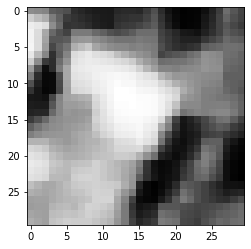

sign: 0 predict: 1


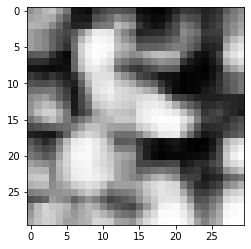

sign: 0 predict: 1


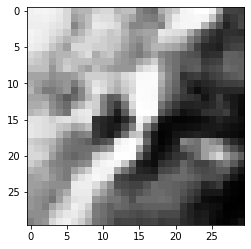

sign: 0 predict: 1


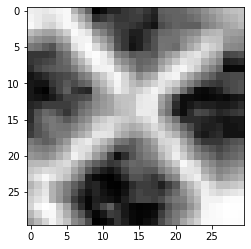

sign: 0 predict: 1


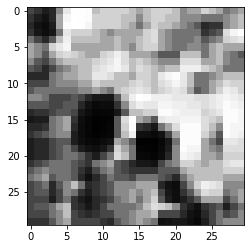

sign: 0 predict: 1


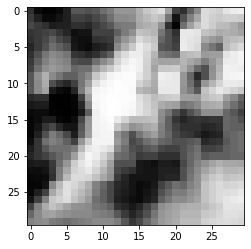

sign: 0 predict: 1


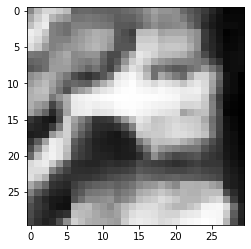

sign: 1 predict: 0


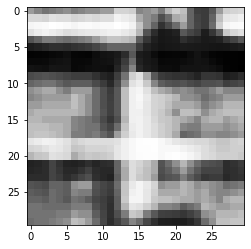

sign: 0 predict: 1


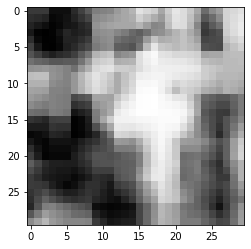

sign: 0 predict: 1


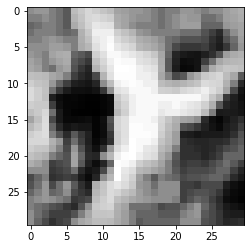

sign: 1 predict: 0


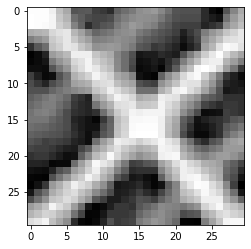

sign: 0 predict: 1


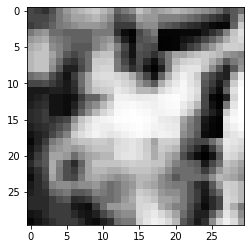

sign: 0 predict: 1


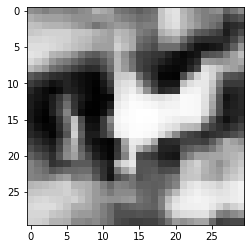

sign: 1 predict: 0


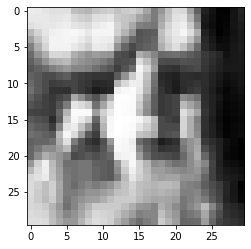

sign: 1 predict: 0


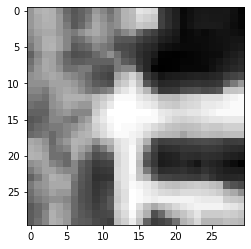

sign: 0 predict: 1


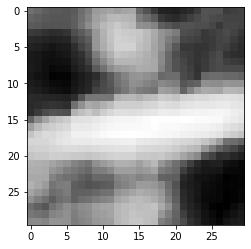

sign: 1 predict: 0


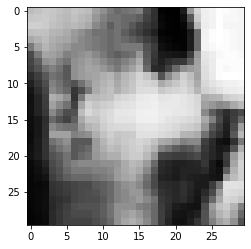

sign: 1 predict: 0


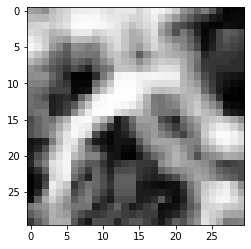

sign: 0 predict: 1


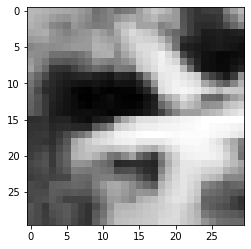

sign: 1 predict: 0


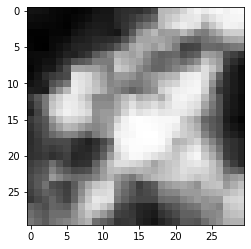

sign: 0 predict: 1


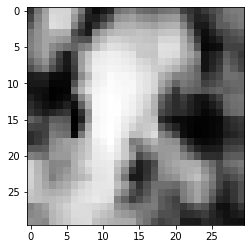

sign: 0 predict: 1


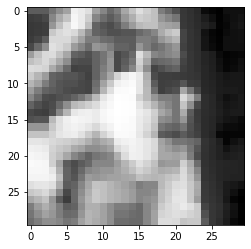

sign: 1 predict: 0


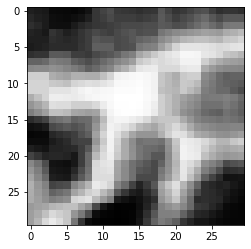

sign: 0 predict: 1


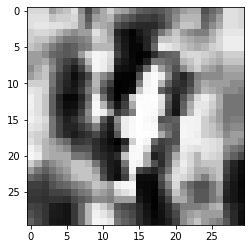

sign: 1 predict: 0


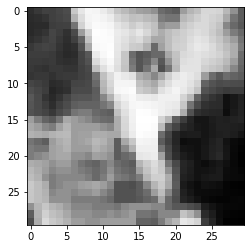

sign: 0 predict: 1


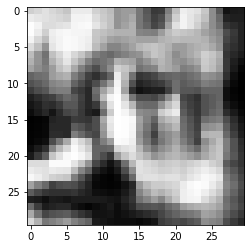

sign: 1 predict: 0


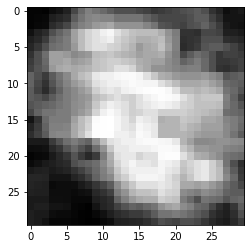

sign: 0 predict: 1


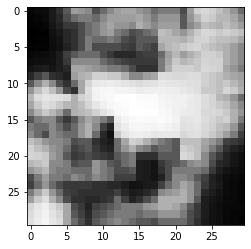

sign: 1 predict: 0


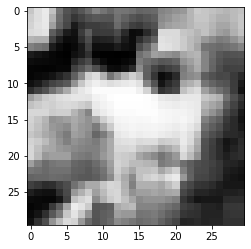

sign: 0 predict: 1


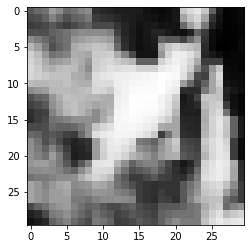

sign: 1 predict: 0


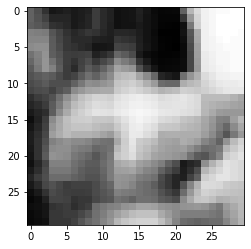

sign: 1 predict: 0


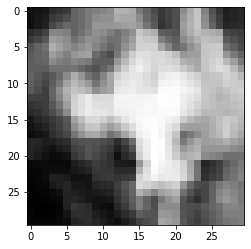

sign: 0 predict: 1


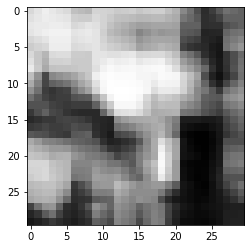

sign: 0 predict: 1


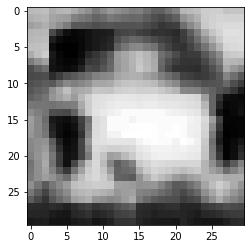

sign: 0 predict: 1


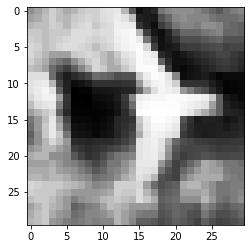

sign: 1 predict: 0


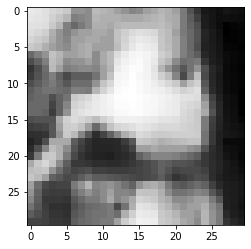

sign: 1 predict: 0


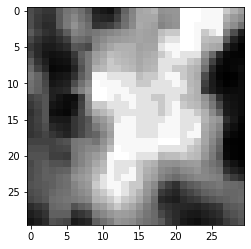

sign: 0 predict: 1


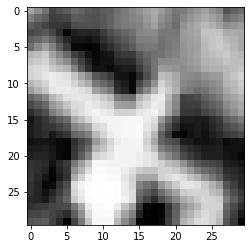

sign: 0 predict: 1


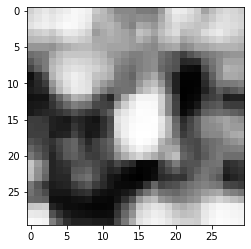

sign: 0 predict: 1


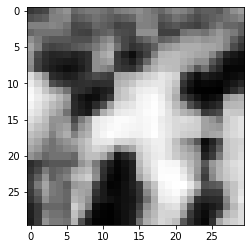

sign: 0 predict: 1


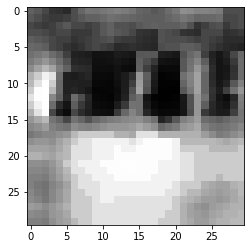

sign: 0 predict: 1


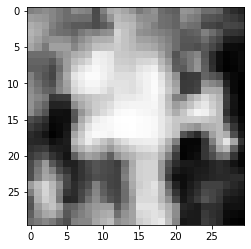

sign: 0 predict: 1


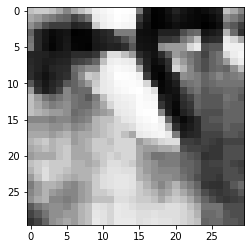

sign: 0 predict: 1


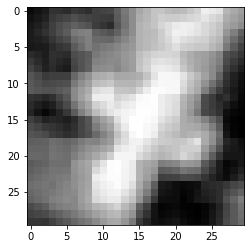

sign: 0 predict: 1


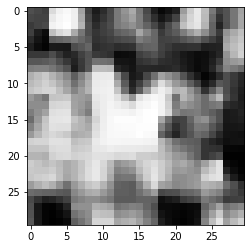

sign: 0 predict: 1


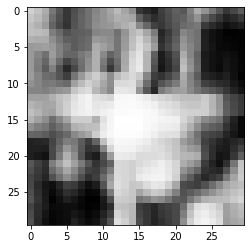

sign: 0 predict: 1


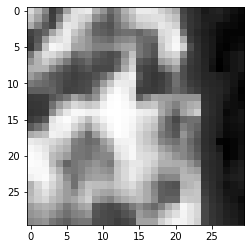

sign: 1 predict: 0


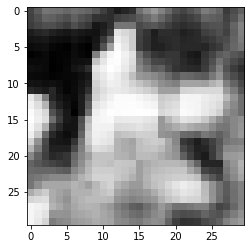

sign: 0 predict: 1


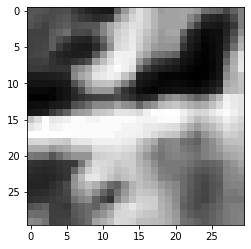

sign: 1 predict: 0


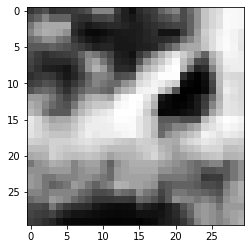

sign: 0 predict: 1


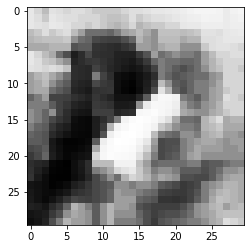

sign: 1 predict: 0


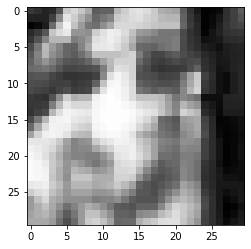

sign: 1 predict: 0


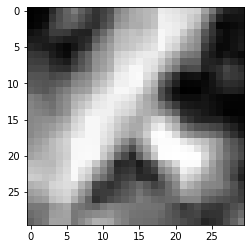

sign: 0 predict: 1


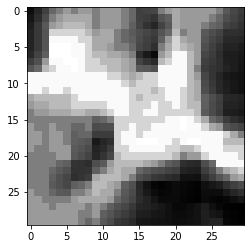

sign: 1 predict: 0


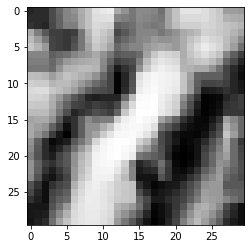

sign: 0 predict: 1


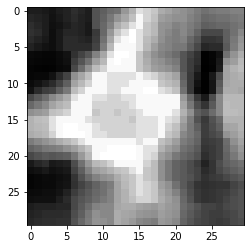

sign: 1 predict: 0


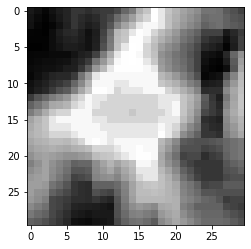

sign: 1 predict: 0


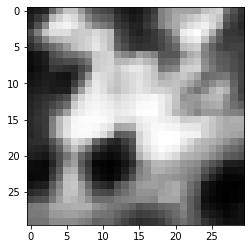

sign: 0 predict: 1


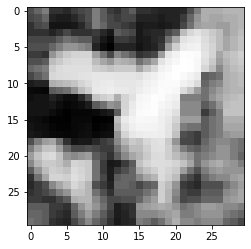

sign: 1 predict: 0


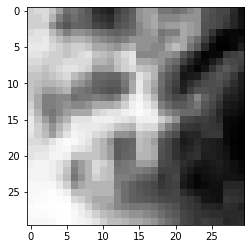

sign: 1 predict: 0


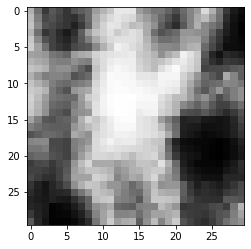

sign: 0 predict: 1


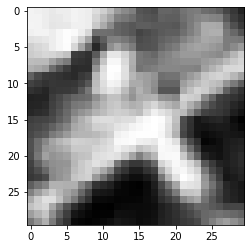

sign: 0 predict: 1


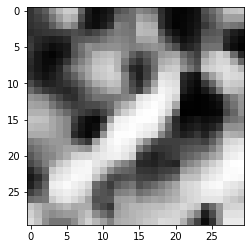

sign: 0 predict: 1


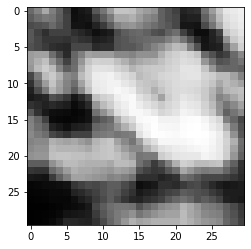

sign: 0 predict: 1


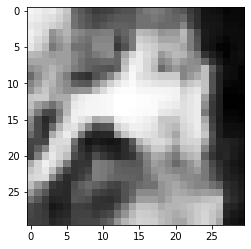

sign: 1 predict: 0


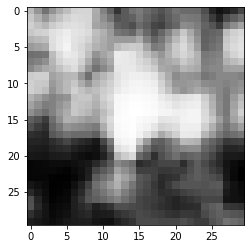

sign: 0 predict: 1


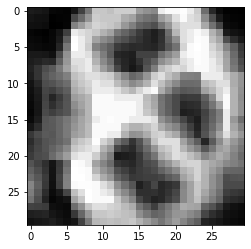

sign: 0 predict: 1


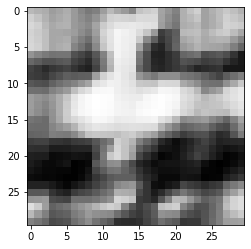

sign: 0 predict: 1


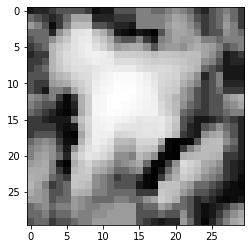

sign: 1 predict: 0


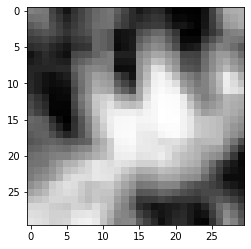

sign: 0 predict: 1


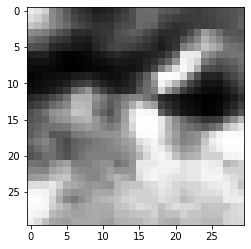

sign: 1 predict: 0


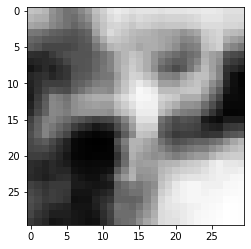

sign: 1 predict: 0


In [ ]:
#Посмотреть что не так с 6%
import os
import cv2
import matplotlib.pyplot as plt

r = model.predict_classes(x_train)
print(r.shape)
data_train = pd.read_csv('train.csv')
data_train = pd.concat((data_train, data_train))
print(data_train.head(5))
data_train['sign_predict'] = r
data_train = data_train[['sign', 'sign_predict', 'filename']]
print(data_train.head(5))

data_error = data_train[data_train['sign']!=data_train['sign_predict']]
print(data_error.shape)
curr_path = os.getcwd()
directory = os.path.join(curr_path, "avia-train30_alignment/avia-train")
    
for row in data_error.values:
    abspath = os.path.join(directory, row[2]+ '.png')
    img = cv2.imread(abspath, 0)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()
    print(f'sign: {row[0]} predict: {row[1]}')